# Logistic Regression Assignment

## Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting Data

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## EDA

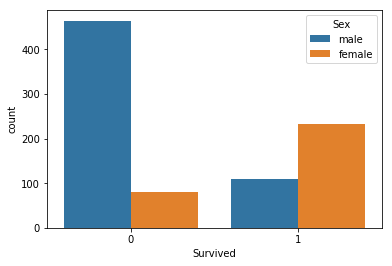

In [4]:
sns.countplot(x='Survived',hue='Sex',data=data)

The above graph shows that: <br>
1. We have less number of people who survived the accident. <br>
2. Those people who survived had more females than males. <br>
3. For those who died, number of males was significantly higher.


In [5]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

This shows none of the values are missing in the dataset.

In [6]:
data.nunique()

Survived                     2
Pclass                       3
Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

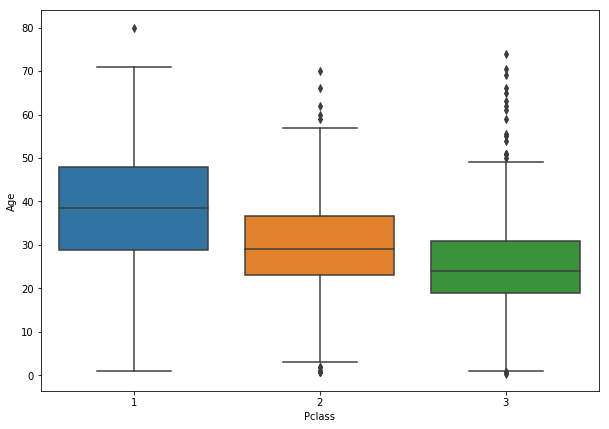

In [7]:
plt.subplots(figsize=(10,7))
sns.boxplot(y='Age',x='Pclass',data=data)

We can infer that: <br>
1. Median Age of Pclass=1 > Median Age of Pclass=2 > Median Age of Pclass=3 <br>
2. Pclass 1 has only 1 outlier followed by Pclass 2 which has 7 outliers. The highest number of outliers are present     in Pclass 3 <br>



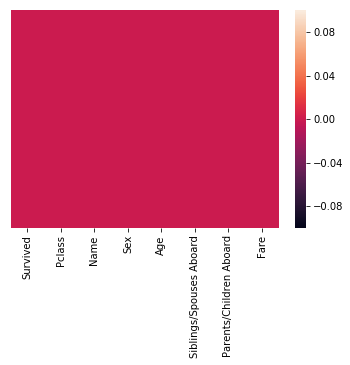

In [8]:
sns.heatmap(data.isnull(), yticklabels=False)

No missing value

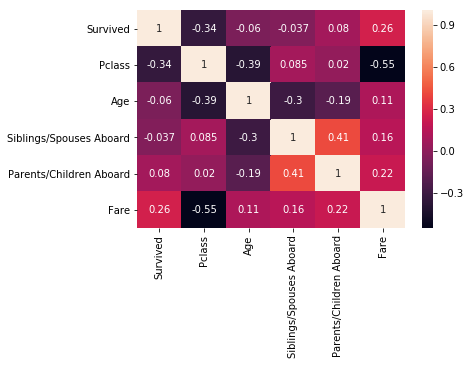

In [9]:
sns.heatmap(data.corr(),annot=True)

1. Survived and Pclass are weakly negatively correlated. 
2. Survived and Fare are weakly positively correlated. 
3. Pclass and Fare are moderately negatively correlated.
4. Sibiling/Spouse aboard,Pclass have weak negative correlation with Age
5. Fare has weak positive correlation with Age
6. Parents/Children Aboard and Sibling/Spouses Abroad are moderately positively correlated
7. Parents/Children Aboard and Fare are weakly positively correlated.
8. Pclass and Fare are moderately negatively correlated.

Why we can use Logistic?

Classification question. Target variable is 1-0 (Survived or not).
Little multicollinearity is allowed in Logistic(Independent variables shouldn't be highly correlated)


## Preparing Data

In [10]:
# Since, name is not important we can remove it.
# Sex,Pclass, Sibling/Spouses,Parents/Children Aboard need to be encoded

In [11]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [12]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [13]:
x = x.drop(columns=['Name'])

In [14]:
x.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


## One hot Encoding

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encode = ColumnTransformer(transformers = [('encoder',OneHotEncoder(drop='first',sparse = False),[0,1,3,4])],remainder="passthrough")
x_matrix = pd.DataFrame(encode.fit_transform(x))

In [16]:
x_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,7.2500
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,71.2833
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,7.9250
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,53.1000
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,8.0500


Column no. 0,1 are encoded for Pclass 2 and Pclass 3

Column no. 2 is encoded for Male (1 for male and 0 for female)

Column no. 3-8 are for Siblings and Columns for Siblings =0 has been dropped

Column 9-14 are for Parents and column for Parents = 0 has been dropped.

Note: Columns have been dropped to avoid multicollinearity.

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_matrix,y,test_size=0.2,random_state=1)

## Scaling Data
We fit by training data and transform train and test data with it. This is done to avoid leakage of test data while training.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_test)

array([[-0.50923967,  0.912163  ,  0.72438331, ...,  0.        ,
         0.78392092, -0.47875509],
       [ 1.96371189, -1.09629529, -1.38048459, ...,  0.        ,
        -0.37544774, -0.12994672],
       [ 1.96371189, -1.09629529, -1.38048459, ...,  0.        ,
         1.94328958, -0.42619493],
       ...,
       [-0.50923967, -1.09629529, -1.38048459, ...,  0.        ,
         1.59196574,  1.16016643],
       [-0.50923967, -1.09629529, -1.38048459, ...,  0.        ,
        -1.00783065,  3.41236952],
       [-0.50923967,  0.912163  ,  0.72438331, ...,  0.        ,
        -0.72677158, -0.47302126]])

## Modelling

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=500)

max_iter has been increased as iterations were above 100 (which is default value of max_iter)

In [20]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=500)

## Prediction

In [21]:
y_pred=LR.predict(x_test)

In [22]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0], dtype=int64)

In [28]:
probability_test = LR.predict_proba(x_test)

In [31]:
probability_test[0:5] #Seeing only first five values

array([[0.943152  , 0.056848  ],
       [0.17601679, 0.82398321],
       [0.52857396, 0.47142604],
       [0.25255448, 0.74744552],
       [0.48121572, 0.51878428]])

From the above we can see that, 

for row 1, Prob of it belonging to class 0(no survival) is 94% and class 1 is 5%.

Similarily, For row 2 (Person 2), Prob of not Surviving is 17.6% and that of surviving is 82%

and so on.

## Evaluation

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


array([[92, 14],
       [22, 50]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.797752808988764

In [25]:
from sklearn.metrics import classification_report
target_names = ['Not Survived(0)','Survived(1)']
print(classification_report(y_test,y_pred,target_names = target_names))

                 precision    recall  f1-score   support

Not Survived(0)       0.81      0.87      0.84       106
    Survived(1)       0.78      0.69      0.74        72

       accuracy                           0.80       178
      macro avg       0.79      0.78      0.79       178
   weighted avg       0.80      0.80      0.80       178



This shows that our model is 80% accurate (accuracy).

Prediction for Not survived is higher in every metric because the data is imbalanced i.e. it has more cases of 0 than 1 (no. of cases can be seen under support metric), so model learns behaviour of 'Not Survived' better.